In [70]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [72]:
calories = pd.read_csv('calories.csv')

In [73]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [74]:
calories.tail()

,User_ID,Calories
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0
14999,11751526,98.0


In [75]:
calories.shape

(15000, 2)

In [76]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [77]:
calories.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


In [78]:
calories.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [79]:
exercise = pd.read_csv('exercise.csv')

In [80]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [81]:
exercise.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5


In [82]:
exercise.shape

(15000, 8)

# Combining the 2 Dataframes 

In [83]:
calories_data = pd.concat([exercise,calories['Calories']],axis=1)

In [84]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [85]:
calories_data.shape

(15000, 9)

In [86]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [87]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [88]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Data Analysis

In [89]:
calories_data['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [90]:
sns.set()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


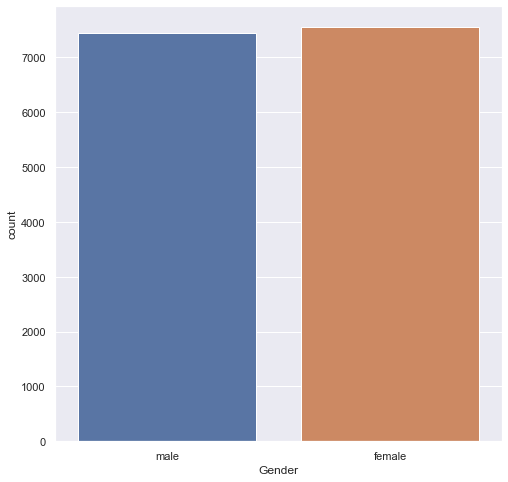

In [91]:
plt.figure(figsize=(8,8))
sns.countplot(calories_data['Gender'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


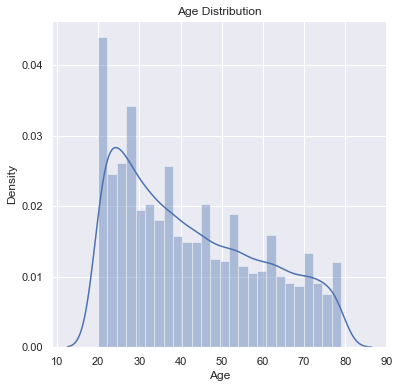

In [92]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Age'])
plt.title("Age Distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


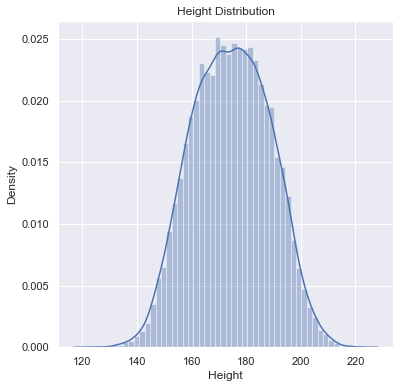

In [93]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Height'])
plt.title("Height Distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


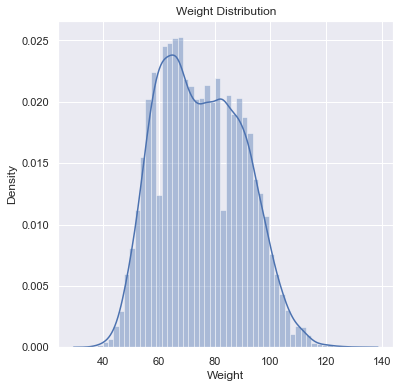

In [94]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Weight'])
plt.title("Weight Distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


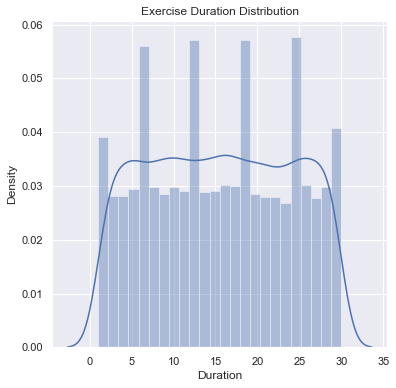

In [95]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Duration'])
plt.title("Exercise Duration Distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


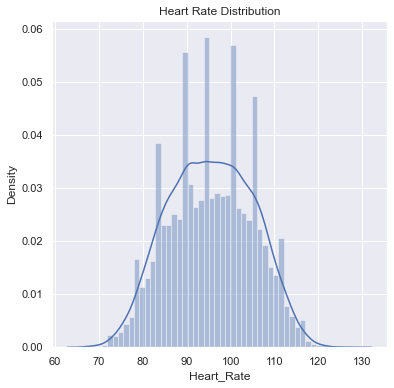

In [96]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Heart_Rate'])
plt.title("Heart Rate Distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


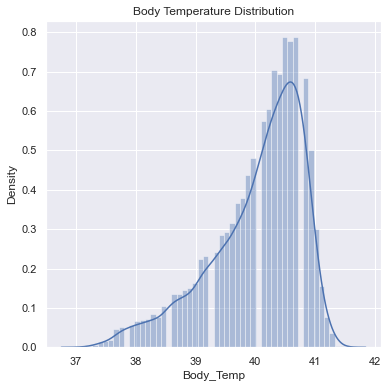

In [97]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Body_Temp'])
plt.title("Body Temperature Distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


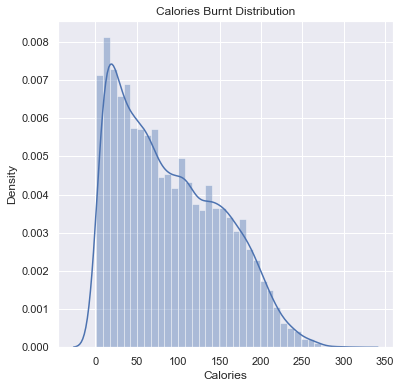

In [98]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Calories'])
plt.title("Calories Burnt Distribution")
plt.show()

# Categorical Data Encoding

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
encoder = LabelEncoder()

In [101]:
calories_data['Gender'] = encoder.fit_transform(calories_data['Gender'])

In [102]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


# 0 - Female
# 1 - Male

In [103]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int32  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int32(1), int64(2)
memory usage: 996.2 KB


In [104]:
calories_data['Gender'].value_counts()

0    7553
1    7447
Name: Gender, dtype: int64

# Find the correlation of the features

In [105]:
corr = calories_data.corr()
print(corr)

             User_ID    Gender       Age    Height    Weight  Duration  \
User_ID     1.000000 -0.000687 -0.001827 -0.013520 -0.011603 -0.002751   
Gender     -0.000687  1.000000  0.003222  0.710534  0.783186  0.003440   
Age        -0.001827  0.003222  1.000000  0.009554  0.090094  0.013247   
Height     -0.013520  0.710534  0.009554  1.000000  0.958451 -0.004625   
Weight     -0.011603  0.783186  0.090094  0.958451  1.000000 -0.001884   
Duration   -0.002751  0.003440  0.013247 -0.004625 -0.001884  1.000000   
Heart_Rate -0.000457  0.011555  0.010482  0.000528  0.004311  0.852869   
Body_Temp   0.000923  0.007264  0.013175  0.001200  0.004095  0.903167   
Calories   -0.001661  0.022357  0.154395  0.017537  0.035481  0.955421   

            Heart_Rate  Body_Temp  Calories  
User_ID      -0.000457   0.000923 -0.001661  
Gender        0.011555   0.007264  0.022357  
Age           0.010482   0.013175  0.154395  
Height        0.000528   0.001200  0.017537  
Weight        0.004311   0.00

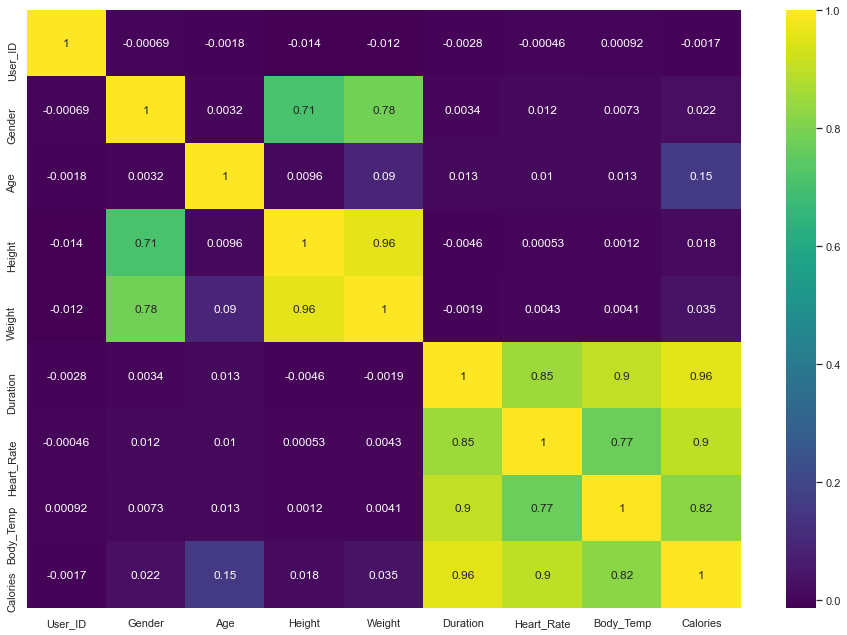

In [106]:
plt.figure(figsize=(16,11))
sns.heatmap(corr,cbar=True,annot=True,cmap='viridis')
plt.show()

# Splitting the data

In [107]:
X = calories_data.drop(columns=['User_ID','Calories'],axis=1)
y = calories_data['Calories']

In [108]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [109]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [110]:
X.shape,y.shape

((15000, 7), (15000,))

# Train Test Split

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [112]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(12000, 7) (3000, 7) (12000,) (3000,)


# Model Training

In [113]:
model = XGBRegressor()

In [114]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Evaluating the model

In [115]:
train_predictions = model.predict(X_train)

In [116]:
print("Mean Absolute Error on training data:: ",metrics.mean_absolute_error(y_train,train_predictions))

Mean Absolute Error on training data::  0.9656331550205747


In [117]:
test_predictions = model.predict(X_test)

In [118]:
print("Mean Absolute Error on testing data:: ",metrics.mean_absolute_error(y_test,test_predictions))

Mean Absolute Error on testing data::  1.4807048829992613


# Building a Predictive System

In [119]:
input_data = (0,36,151.0,50.0,23.0,96.0,40.7)

input_data_array = np.asarray(input_data)

input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print("Calories Burnt Predicted is",prediction[0])

Calories Burnt Predicted is 125.71242
